<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [10]:
!pip install pandas
!pip install matplotlib

Import pandas module


In [11]:
import pandas as pd


Import matplotlib


In [12]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [13]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [20]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65457 entries, 0 to 65456
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None


In [22]:
print(df.shape)

(65457, 114)


In [54]:
df.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65457 entries, 0 to 65456
Data columns (total 100 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   MainBranch                      65457 non-null  object
 1   Age                             65457 non-null  object
 2   Employment                      65457 non-null  object
 3   RemoteWork                      54820 non-null  object
 4   Check                           65457 non-null  object
 5   CodingActivities                54480 non-null  object
 6   EdLevel                         60803 non-null  object
 7   LearnCode                       60507 non-null  object
 8   LearnCodeOnline                 49251 non-null  object
 9   TechDoc                         40907 non-null  object
 10  YearsCode                       59887 non-null  object
 11  YearsCodePro                    51623 non-null  object
 12  DevType                         59463 non-nul

## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [31]:
## Write your code here
duplicate_rows = df.duplicated()

print(type(duplicate_rows))
print(len(duplicate_rows))

duplicate_rows_df = df.loc[duplicate_rows]
print(duplicate_rows_df.head())

<class 'pandas.core.series.Series'>
65457


In [29]:
duplicate_rows_df = df.loc[duplicate_rows]
print(duplicate_rows_df.head())

       ResponseId                      MainBranch                 Age  \
65437           1  I am a developer by profession  Under 18 years old   
65438           2  I am a developer by profession     35-44 years old   
65439           3  I am a developer by profession     45-54 years old   
65440           4           I am learning to code     18-24 years old   
65441           5  I am a developer by profession     18-24 years old   

                Employment RemoteWork   Check  \
65437  Employed, full-time     Remote  Apples   
65438  Employed, full-time     Remote  Apples   
65439  Employed, full-time     Remote  Apples   
65440   Student, full-time        NaN  Apples   
65441   Student, full-time        NaN  Apples   

                                        CodingActivities  \
65437                                              Hobby   
65438  Hobby;Contribute to open-source projects;Other...   
65439  Hobby;Contribute to open-source projects;Other...   
65440                     

In [37]:
duplicate_rows_df.shape

(20, 114)

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [34]:
duplicate_rows_df['MainBranch'].value_counts()

MainBranch
I am a developer by profession                                                           12
I code primarily as a hobby                                                               3
I am not primarily a developer, but I write code sometimes as part of my work/studies     3
I am learning to code                                                                     2
Name: count, dtype: int64

In [35]:
# Employment
duplicate_rows_df['Employment'].value_counts()

Employment
Employed, full-time                                                         10
Student, full-time                                                           4
Student, full-time;Not employed, but looking for work                        1
Independent contractor, freelancer, or self-employed                         1
Student, full-time;Employed, part-time                                       1
Employed, full-time;Employed, part-time                                      1
Employed, full-time;Independent contractor, freelancer, or self-employed     1
Retired                                                                      1
Name: count, dtype: int64

In [36]:
duplicate_rows_df['RemoteWork'].value_counts()

RemoteWork
Remote                                  9
Hybrid (some remote, some in-person)    3
In-person                               2
Name: count, dtype: int64

In [38]:
# Instead of checking ALL columns, check specific ones
subset_columns = ['MainBranch', 'Employment', 'RemoteWork']
duplicate_rows_subset = df.duplicated(subset=subset_columns)
duplicate_rows_df_subset = df.loc[duplicate_rows_subset]

print(f"Complete duplicates: {duplicate_rows.sum()}")
print(f"Partial duplicates (MainBranch, Employment, RemoteWork): {duplicate_rows_subset.sum()}")

Complete duplicates: 20
Partial duplicates (MainBranch, Employment, RemoteWork): 64896


In [41]:
duplicate_rows_df_subset[subset_columns]

,MainBranch,Employment,RemoteWork
1,I am a developer by profession,"Employed, full-time",Remote
2,I am a developer by profession,"Employed, full-time",Remote
14,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)"
15,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)"
16,I code primarily as a hobby,"Student, full-time",NaN
...,...,...,...
65452,"I am not primarily a developer, but I write co...","Student, full-time;Employed, part-time",In-person
65453,I am a developer by profession,"Employed, full-time;Employed, part-time",Remote
65454,I am a developer by profession,"Employed, full-time;Independent contractor, fr...","Hybrid (some remote, some in-person)"
65455,I am a developer by profession,"Employed, full-time",Remote


In [42]:
## Write your code here
# 1. Look at combinations of the key columns used for duplicate detection
duplicate_combinations = duplicate_rows_df.groupby(['MainBranch', 'Employment', 'RemoteWork']).size().sort_values(ascending=False)
print("Most common duplicate combinations:")
print(duplicate_combinations.head(10))



Most common duplicate combinations:
MainBranch                                                                             Employment                                                                RemoteWork                          
I am a developer by profession                                                         Employed, full-time                                                       Remote                                  5
                                                                                                                                                                 Hybrid (some remote, some in-person)    2
I am not primarily a developer, but I write code sometimes as part of my work/studies  Employed, full-time                                                       Remote                                  2
I am a developer by profession                                                         Employed, full-time;Employed, part-time                               

In [43]:
# 2. For each column, see what values appear most in duplicates
print("\n=== Analysis of each column in duplicates ===")
for col in ['MainBranch', 'Employment', 'RemoteWork']:
    print(f"\n{col} in duplicate rows:")
    print(duplicate_rows_df[col].value_counts().head())



=== Analysis of each column in duplicates ===

MainBranch in duplicate rows:
MainBranch
I am a developer by profession                                                           12
I code primarily as a hobby                                                               3
I am not primarily a developer, but I write code sometimes as part of my work/studies     3
I am learning to code                                                                     2
Name: count, dtype: int64

Employment in duplicate rows:
Employment
Employed, full-time                                      10
Student, full-time                                        4
Student, full-time;Not employed, but looking for work     1
Independent contractor, freelancer, or self-employed      1
Student, full-time;Employed, part-time                    1
Name: count, dtype: int64

RemoteWork in duplicate rows:
RemoteWork
Remote                                  9
Hybrid (some remote, some in-person)    3
In-person              

In [44]:

# 3. Look at what other columns also have identical values within duplicate groups
# Group by the duplicate-defining columns and see which other columns are also identical
duplicate_groups = duplicate_rows_df.groupby(['MainBranch', 'Employment', 'RemoteWork'])

print("\n=== Other columns that are often identical in duplicate groups ===")
for name, group in duplicate_groups:
    if len(group) > 1:  # Only look at actual duplicate groups
        print(f"\nGroup: {name} ({len(group)} rows)")
        # Check which other columns have identical values across this duplicate group
        for col in df.columns:
            if col not in ['MainBranch', 'Employment', 'RemoteWork']:
                unique_vals = group[col].nunique()
                if unique_vals == 1:  # All values in this column are identical
                    print(f"  {col}: identical values")


=== Other columns that are often identical in duplicate groups ===

Group: ('I am a developer by profession', 'Employed, full-time', 'Hybrid (some remote, some in-person)') (2 rows)
  Check: identical values
  EdLevel: identical values
  LearnCodeOnline: identical values
  OrgSize: identical values
  PurchaseInfluence: identical values
  BuyNewTool: identical values
  CompTotal: identical values
  LanguageWantToWorkWith: identical values
  LanguageAdmired: identical values
  DatabaseWantToWorkWith: identical values
  DatabaseAdmired: identical values
  PlatformWantToWorkWith: identical values
  PlatformAdmired: identical values
  WebframeHaveWorkedWith: identical values
  MiscTechHaveWorkedWith: identical values
  MiscTechWantToWorkWith: identical values
  MiscTechAdmired: identical values
  ToolsTechHaveWorkedWith: identical values
  ToolsTechWantToWorkWith: identical values
  ToolsTechAdmired: identical values
  NEWCollabToolsWantToWorkWith: identical values
  NEWCollabToolsAdmired:

In [72]:
# Look at the few columns that are NOT identical
group = duplicate_rows_df[
    (duplicate_rows_df['MainBranch'] == 'I am a developer by profession') & 
    (duplicate_rows_df['Employment'] == 'Employed, full-time') & 
    (duplicate_rows_df['RemoteWork'] == 'Hybrid (some remote, some in-person)')
]

# Check which columns are different
for col in df.columns:
    if group[col].nunique() > 1:
        print(f"{col}: {group[col].values}")

ResponseId: [51198 44085]
Age: ['25-34 years old' '35-44 years old']
CodingActivities: ['Hobby;Contribute to open-source projects' 'I don’t code outside of work']
LearnCode: ['Books / Physical media;Online Courses or Certification'
 'On the job training;Other online resources (e.g., videos, blogs, forum, online community);School (i.e., University, College, etc);Online Courses or Certification']
YearsCode: ['7' '22']
YearsCodePro: ['3' '20']
DevType: ['Data engineer' 'Developer, full-stack']
BuildvsBuy: ['Is ready-to-go but also customizable for growth and targeted use cases'
 'Out-of-the-box is ready to go with little need for customization']
TechEndorse: ['APIs;Customization;Integrated developer community;Connected to an open source project'
 'Integrated developer community;Reputation for quality and excellence']
Country: ['Egypt' 'United States of America']
Currency: ['EGP\tEgyptian pound' 'USD\tUnited States dollar']
LanguageHaveWorkedWith: ['Python;Scala;SQL;Swift'
 'HTML/CSS;JavaS

In [49]:
# Look at the few columns that are NOT identical
group = duplicate_rows_df[
    (duplicate_rows_df['MainBranch'] == 'I am a developer by profession') & 
    (duplicate_rows_df['Employment'] == 'Employed, full-time') & 
    (duplicate_rows_df['RemoteWork'] == 'Hybrid (some remote, some in-person)')
]

# Check which columns are different
for col in df.columns:
    if group[col].nunique() > 1:
        print(f"{col}: {group[col].values}")

ResponseId: [51198 44085]
Age: ['25-34 years old' '35-44 years old']
CodingActivities: ['Hobby;Contribute to open-source projects' 'I don’t code outside of work']
LearnCode: ['Books / Physical media;Online Courses or Certification'
 'On the job training;Other online resources (e.g., videos, blogs, forum, online community);School (i.e., University, College, etc);Online Courses or Certification']
YearsCode: ['7' '22']
YearsCodePro: ['3' '20']
DevType: ['Data engineer' 'Developer, full-stack']
BuildvsBuy: ['Is ready-to-go but also customizable for growth and targeted use cases'
 'Out-of-the-box is ready to go with little need for customization']
TechEndorse: ['APIs;Customization;Integrated developer community;Connected to an open source project'
 'Integrated developer community;Reputation for quality and excellence']
Country: ['Egypt' 'United States of America']
Currency: ['EGP\tEgyptian pound' 'USD\tUnited States dollar']
LanguageHaveWorkedWith: ['Python;Scala;SQL;Swift'
 'HTML/CSS;JavaS

In [73]:

df['OfficeStackSyncHaveWorkedWith'].value_counts()

OfficeStackSyncHaveWorkedWith
Microsoft Teams                                                             5764
Discord                                                                     1610
Microsoft Teams;Slack                                                       1576
Slack                                                                       1508
Slack;Zoom                                                                  1403
                                                                            ... 
Discord;Mattermost;Microsoft Teams;Skype;Slack;Whatsapp;Zoom                   1
Cisco Webex Teams;Discord;Jitsi;Microsoft Teams;Rocketchat                     1
Discord;Google Chat;Google Meet;Skype;Slack;Telegram                           1
Cisco Webex Teams;Discord;Google Chat;Google Meet;Skype;Slack;Wickr;Zoom       1
Cisco Webex Teams;Google Chat;Google Meet;Skype;Slack;Whatsapp;Zoom            1
Name: count, Length: 5049, dtype: int64

In [48]:
df['Check'].value_counts()

Check
Apples    65457
Name: count, dtype: int64

In [76]:
ri = df['ResponseId'].loc[df['ResponseId'].duplicated()]
# print(ri.value_counts()) 
print(len(ri))

20


In [69]:
df_2 = df.drop('ResponseId', axis=1)
df_2_duplets = df_2.loc[df_2.duplicated()]

df_2_duplets.shape

(507, 113)

In [70]:
df['EdLevel'].value_counts()

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          24947
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15560
Some college/university study without earning a degree                                 7656
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     5795
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         2972
Associate degree (A.A., A.S., etc.)                                                    1793
Primary/elementary school                                                              1148
Something else                                                                          932
Name: count, dtype: int64

In [77]:
# YearsCode
# df['YearsCode'].value_counts()

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


In [94]:
combinations = \
df.groupby(['MainBranch', 'Employment', 'RemoteWork']).size().\
sort_values(ascending=False)

combinations

MainBranch                                                Employment                                                                                                                                                                                                            RemoteWork                          
I am a developer by profession                            Employed, full-time                                                                                                                                                                                                   Hybrid (some remote, some in-person)    15288
                                                                                                                                                                                                                                                                                Remote                                  12196
                                                       

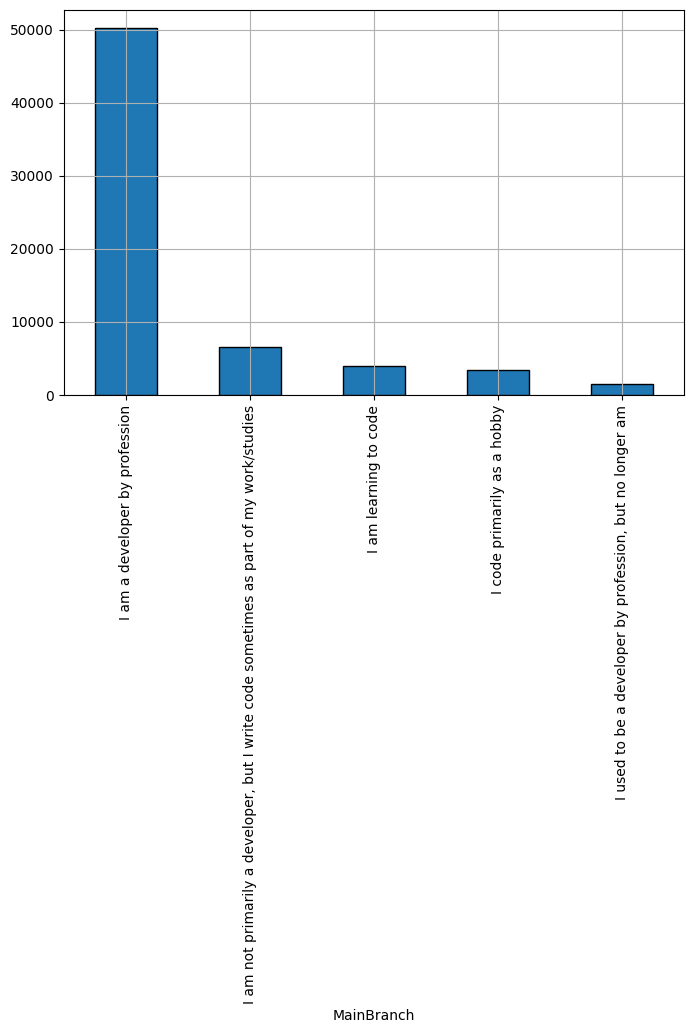

In [90]:
## Write your code here

df['MainBranch'].value_counts().plot.bar(edgecolor='black', figsize=(8,5))
plt.grid()
plt.xticks(rotation=90)
plt.show()

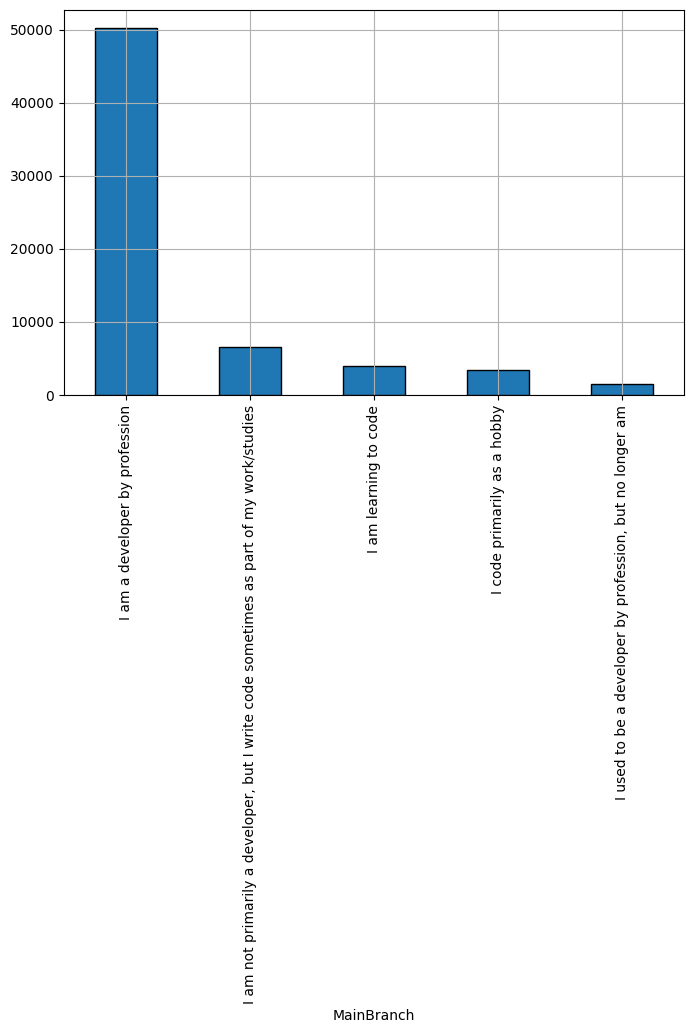

In [90]:
## Write your code here

df['MainBranch'].value_counts().plot.bar(edgecolor='black', figsize=(8,5))
plt.grid()
plt.xticks(rotation=90)
plt.show()

In [97]:
len(df['Employment'].unique())

110

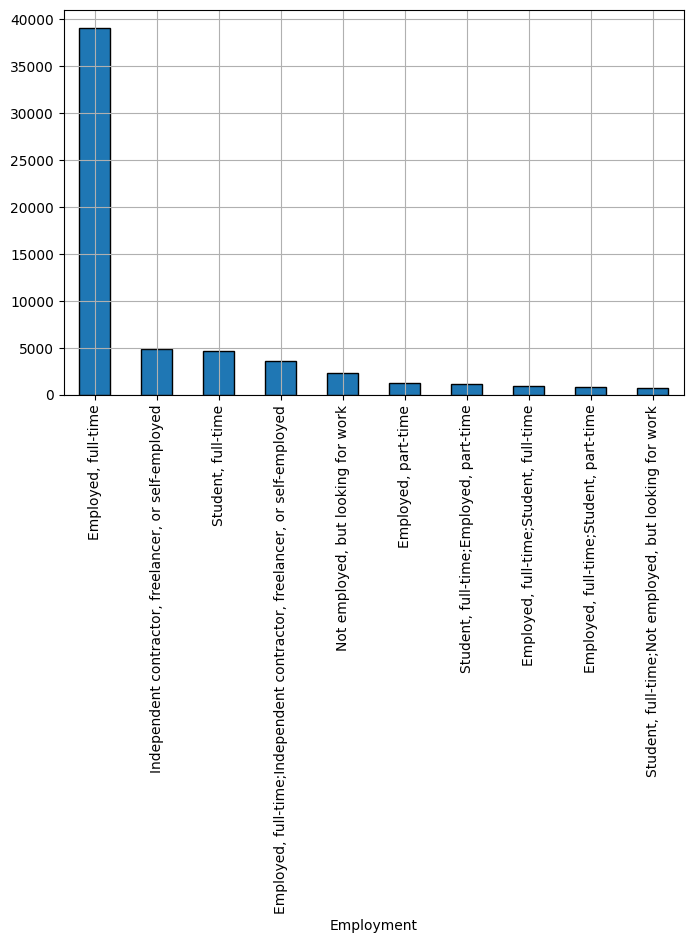

In [107]:
df['Employment'].value_counts().sort_values(ascending=False)[:10].plot.bar(edgecolor='black', figsize=(8,5))
plt.grid()
plt.xticks(rotation=90)
plt.show()

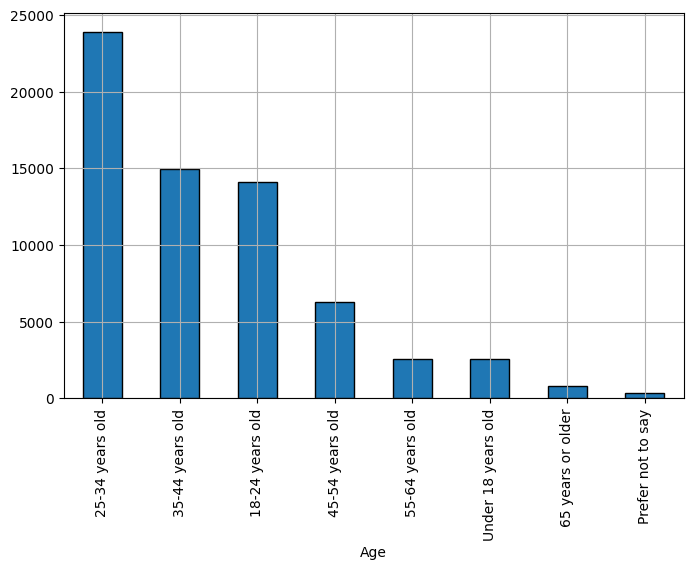

In [98]:

df['Age'].value_counts().plot.bar(edgecolor='black', figsize=(8,5))
plt.grid()
plt.xticks(rotation=90)
plt.show()

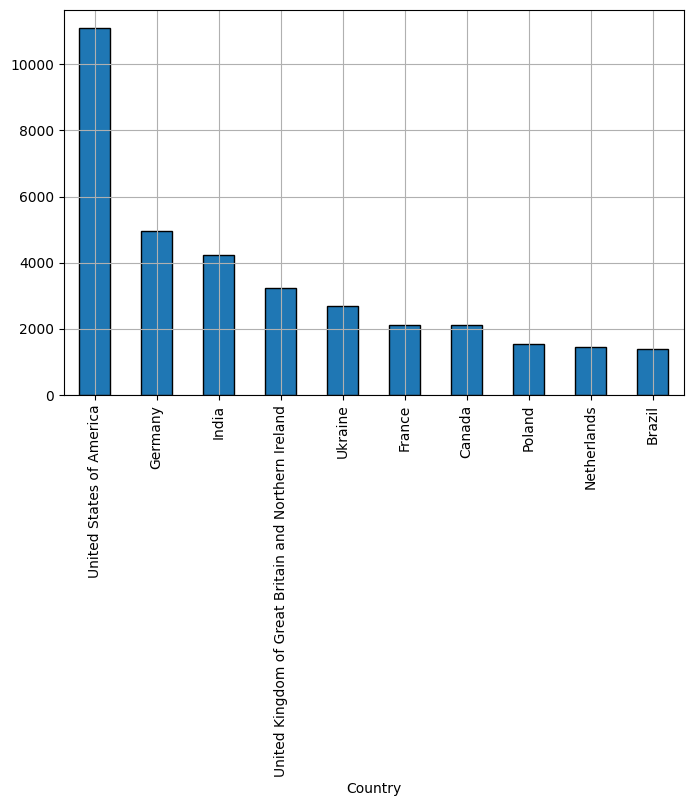

In [106]:
df['Country'].value_counts().sort_values(ascending
=False)[:10].plot.bar(edgecolor='black', figsize=(8,5))
plt.grid()
plt.xticks(rotation=90)
plt.show()

In [49]:
# Look at the few columns that are NOT identical
group = duplicate_rows_df[
    (duplicate_rows_df['MainBranch'] == 'I am a developer by profession') & 
    (duplicate_rows_df['Employment'] == 'Employed, full-time') & 
    (duplicate_rows_df['RemoteWork'] == 'Hybrid (some remote, some in-person)')
]

# Check which columns are different
for col in df.columns:
    if group[col].nunique() > 1:
        print(f"{col}: {group[col].values}")

ResponseId: [51198 44085]
Age: ['25-34 years old' '35-44 years old']
CodingActivities: ['Hobby;Contribute to open-source projects' 'I don’t code outside of work']
LearnCode: ['Books / Physical media;Online Courses or Certification'
 'On the job training;Other online resources (e.g., videos, blogs, forum, online community);School (i.e., University, College, etc);Online Courses or Certification']
YearsCode: ['7' '22']
YearsCodePro: ['3' '20']
DevType: ['Data engineer' 'Developer, full-stack']
BuildvsBuy: ['Is ready-to-go but also customizable for growth and targeted use cases'
 'Out-of-the-box is ready to go with little need for customization']
TechEndorse: ['APIs;Customization;Integrated developer community;Connected to an open source project'
 'Integrated developer community;Reputation for quality and excellence']
Country: ['Egypt' 'United States of America']
Currency: ['EGP\tEgyptian pound' 'USD\tUnited States dollar']
LanguageHaveWorkedWith: ['Python;Scala;SQL;Swift'
 'HTML/CSS;JavaS

### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [74]:
## Write your code here
# These likely define a unique respondent
identity_cols = ['Country', 'Age', 'Employment', 'RemoteWork', 'MainBranch']

# Check uniqueness with these columns
identity_duplicates = df.duplicated(subset=identity_cols)
print(f"Duplicates based on identity columns: {identity_duplicates.sum()}")

Duplicates based on identity columns: 53316


In [75]:
# These define professional uniqueness
professional_cols = ['MainBranch', 'Employment', 'DevType', 'YearsCodePro', 
                     'OrgSize', 'Industry', 'Country']

prof_duplicates = df.duplicated(subset=professional_cols)
print(f"Duplicates based on professional profile: {prof_duplicates.sum()}")

Duplicates based on professional profile: 15758


## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


# Duplicate Analysis and Strategic Removal Explanation

## Task 4: Strategic Removal of Duplicates

### Approach: Identity-Based Deduplication

For this analysis, I chose to define duplicate records based on **core identity columns** that would uniquely identify a survey respondent in a real-world context.

### Selected Identity Columns
```python
identity_cols = ['Country', 'Age', 'Employment', 'RemoteWork', 'MainBranch']
```

### Rationale for Column Selection

**Why these columns define uniqueness:**
- **Country**: Geographic location of respondent
- **Age**: Age group (18-24, 25-34, etc.)
- **Employment**: Employment status (full-time, student, etc.)
- **RemoteWork**: Work arrangement (remote, hybrid, in-person)
- **MainBranch**: Professional role (developer, designer, etc.)

**Why this combination makes sense:**
These five columns together create a demographic and professional profile that would be unlikely to be identical for different individuals, while still being broad enough to capture meaningful categories.

### Results

```
Original dataset: 65,457 rows
Duplicates based on identity columns: 53,316 rows
Remaining unique records: 12,141 rows
```

### Interpretation

The high number of duplicates (81.4% of the dataset) indicates that:

1. **Expected categorical overlap**: With limited categories in each column, many respondents naturally share the same demographic profile
2. **Common professional patterns**: Certain combinations (e.g., "25-34 year old full-time developer from US working hybrid") are very common in tech surveys
3. **Survey population clustering**: The developer community tends to cluster around specific demographic and professional characteristics

### Decision Justification

**This approach is appropriate because:**
- It preserves data quality by removing redundant demographic profiles
- It maintains one representative record for each unique identity combination
- It reduces dataset size while preserving analytical value
- It focuses on substantive differences rather than minor response variations

**Alternative considered:**
Complete row deduplication only removed 20 records (0.03%), which would retain excessive redundancy for demographic analysis.

## Alternative Approach: Professional Profile Deduplication

### Selected Professional Columns
```python
professional_cols = ['MainBranch', 'Employment', 'DevType', 'YearsCodePro', 
                     'OrgSize', 'Industry', 'Country']
```

### Results
```
Duplicates based on professional profile: 15,758 rows
Remaining unique professional profiles: 49,699 rows
```

### Reasoning for Professional Profile Approach

**Why these columns define professional uniqueness:**
- **MainBranch**: Primary professional role (Developer, Designer, etc.)
- **Employment**: Employment status and type
- **DevType**: Specific developer specialization (Full-stack, Frontend, etc.)
- **YearsCodePro**: Professional coding experience level
- **OrgSize**: Company size context
- **Industry**: Business sector
- **Country**: Geographic/economic context

**Advantages of this approach:**
1. **Career-focused analysis**: Preserves records that represent distinct professional paths
2. **Lower deduplication rate**: Only 24.1% duplicates vs 81.4% with identity columns
3. **Maintains demographic diversity**: People of different ages/backgrounds in same professional roles are preserved
4. **Business relevance**: More appropriate for workplace/career-related survey analysis

**When to use this approach:**
- Analyzing career progression patterns
- Studying professional development trends
- Examining industry-specific behaviors
- Workplace satisfaction analysis

### Comparison of Approaches

| Approach | Duplicates Removed | Remaining Records | Use Case |
|----------|-------------------|-------------------|----------|
| Identity-based | 53,316 (81.4%) | 12,141 | Demographic analysis |
| Professional-based | 15,758 (24.1%) | 49,699 | Career/workplace analysis |
| Complete row | 20 (0.03%) | 65,437 | Data quality only |

### Conclusion

The choice between identity-based and professional-based deduplication depends on the analytical objective:
- **Identity-based**: Best for demographic studies where age, location, and work arrangement matter
- **Professional-based**: Best for career and workplace studies where professional context is primary

Both approaches are valid strategic choices for different analytical purposes.

### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


## Copyright © IBM Corporation. All rights reserved.
